<a href="https://colab.research.google.com/github/ShubhaVS/DataScience/blob/main/Copy_of_Shirtsct3mycorrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
# Define paths
uploaded_file_path = '/content/shirts.zip'
extract_path = '/content/shirts/'
# Extract the zip file
with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
# List contents of the extracted directory
os.listdir(extract_path)

['queries', 'shirts']

In [ ]:
# Inspect contents of the 'shirts' directory
shirts_dir = os.path.join(extract_path, 'shirts')
queries_dir = os.path.join(extract_path, 'queries')
shirts_contents = os.listdir(shirts_dir)
queries_contents = os.listdir(queries_dir)
shirts_contents[:5], queries_contents[:5]  # Display first 5 items in each folder

(['checked', 'plain', 'stripped'],
 ['query_02.jpg', 'query_01.jpg', 'query_03.jpg'])

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
# Paths for train and validation sets
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')
# Ensure the directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
# Split the data in 'shirts' into train and validation sets
for class_name in shirts_contents:
    class_path = os.path.join(shirts_dir, class_name)
    images = os.listdir(class_path)
    # Split into train and validation (80-20 split)
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    # Create subdirectories for each class in train and validation
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    # Move files to train and validation directories
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))
# Verify train and validation folders
os.listdir(train_dir), os.listdir(val_dir)

(['checked', 'plain', 'stripped'], ['checked', 'plain', 'stripped'])

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
# Paths for train and validation sets
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')
# Ensure the directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
# Split the data in 'shirts' into train and validation sets
for class_name in shirts_contents:
    class_path = os.path.join(shirts_dir, class_name)
    images = os.listdir(class_path)
    # Split into train and validation (80-20 split)
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    # Create subdirectories for each class in train and validation
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    # Move files to train and validation directories
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))
# Verify train and validation folders
os.listdir(train_dir), os.listdir(val_dir)

(['checked', 'plain', 'stripped'], ['checked', 'plain', 'stripped'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32
# Data generators
train_datagen_no_aug = ImageDataGenerator(rescale=1.0/255)  # Without augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255)  # Validation data
# Train data generator with augmentation
train_datagen_aug = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Load data for both cases (with and without augmentation)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7 images belonging to 3 classes.
Found 7 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Data generators
train_datagen_no_aug = ImageDataGenerator(rescale=1.0/255)  # Without augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255)  # Validation data

# Train data generator with augmentation
train_datagen_aug = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load data for both cases (with and without augmentation)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    '/content/shirts/train',  # Update the path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    '/content/shirts/train',  # Update the path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/shirts/validation',  # Update the path
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7 images belonging to 3 classes.
Found 7 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Adjust the output layer based on your classes
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
model_no_aug = build_model()

history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5714 - loss: 1.0512
Epoch 1: val_loss improved from inf to 2.55865, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 1.0512 - val_accuracy: 0.3333 - val_loss: 2.5586
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.2857 - loss: 1.8589
Epoch 2: val_loss improved from 2.55865 to 0.95952, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step - accuracy: 0.2857 - loss: 1.8589 - val_accuracy: 0.3333 - val_loss: 0.9595
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.2857 - loss: 1.5986
Epoch 3: val_loss did not improve from 0.95952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.2857 - loss: 1.5986 - val_accuracy: 0.3333 - val_loss: 1.0248
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.2857 - loss: 1.9685
Epoch 4: val_loss did not improve from 0.95952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.2857 - loss: 1.9685 - v

In [ ]:
model_aug = build_model()

history_aug = model_aug.fit(
    train_generator_aug,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4286 - loss: 1.1108
Epoch 1: val_loss did not improve from 0.35301
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4286 - loss: 1.1108 - val_accuracy: 0.3333 - val_loss: 1.7925
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.2857 - loss: 2.3406
Epoch 2: val_loss did not improve from 0.35301
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 2.3406 - val_accuracy: 0.3333 - val_loss: 1.0049
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.4286 - loss: 1.8737
Epoch 3: val_loss did not improve from 0.35301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4286 - loss: 1.8737 - val_accuracy: 0.3333 - val_loss: 1.1246
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.1429 - loss: 1.0794
Epoch 4: val_loss did not improve from 0.35301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.1429 - loss: 1.0794 - val_accuracy: 0.3333 - val_loss: 1.1040
Epoch 5/20
1/1 ━━━━━━━━━━

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Function to evaluate a model
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

# Evaluate models
print("Without Augmentation:")
evaluate_model(model_no_aug, val_generator)

print("\nWith Augmentation:")
evaluate_model(model_aug, val_generator)

Without Augmentation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
              precision    recall  f1-score   support

     checked       0.00      0.00      0.00         1
       plain       0.50      1.00      0.67         1
    stripped       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3


With Augmentation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

     checked       0.00      0.00      0.00         1
       plain       0.33      1.00      0.50         1
    stripped       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

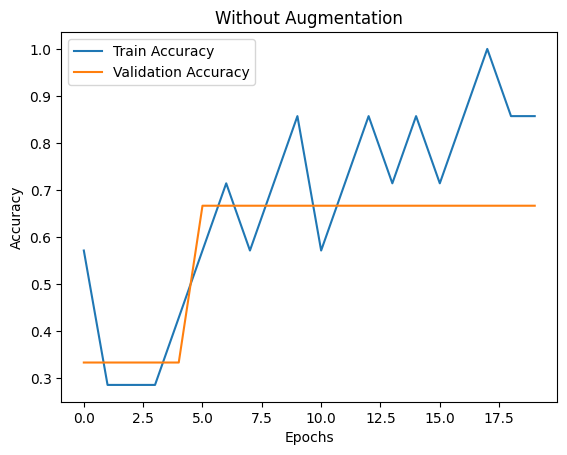

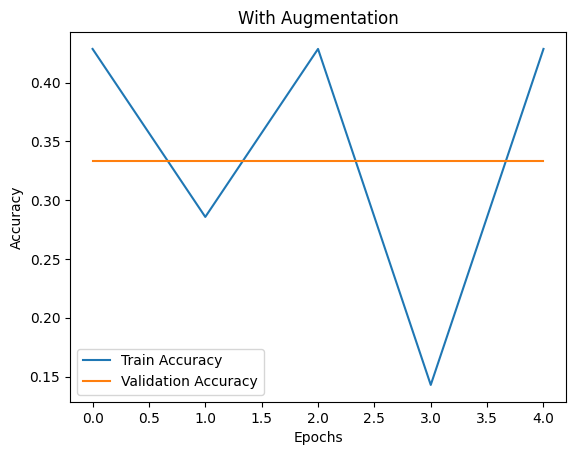

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history_no_aug, "Without Augmentation")
plot_metrics(history_aug, "With Augmentation")